In [2]:
# Preprocessing Temporal and Weather Features 
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
#data load
bikesharing = pd.read_csv("./Data/hour.csv")

In [4]:
season_mapping = {1:"spring", 2:"summer", 3:"fall", 4:"winter"}
yr_mapping = {0: "2011", 1:"2012"}
mnth_mapping = {1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"}
weekday_mapping={0: 'Sunday', 1: 'Monday', 2: 'Tuesday',3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
weather_mapping={1:"Clear",2:"Misty",3:"Light Snow/Rain",4:"Heavy Snow/Rain"}


In [5]:
bikesharing['season']=bikesharing['season'].apply(lambda x: season_mapping[x])
bikesharing['yr']=bikesharing['yr'].apply(lambda x: yr_mapping[x])
bikesharing['mnth']=bikesharing['mnth'].apply(lambda x: mnth_mapping[x])
bikesharing['weekday']=bikesharing['weekday'].apply(lambda x: weekday_mapping[x])
bikesharing['weathersit']=bikesharing['weathersit'].apply(lambda x: weather_mapping[x])

#bikesharing.sample(100)


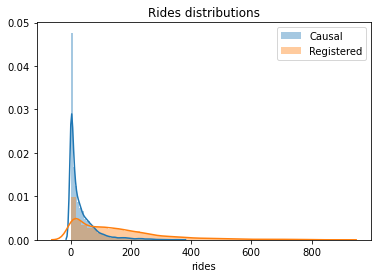

In [6]:
#registered vs casual analysis
#plotting distributions 
sns.distplot(bikesharing['casual'],label="Causal")
sns.distplot(bikesharing['registered'],label="Registered")
plt.legend()
plt.xlabel('rides')
plt.title("Rides distributions")
plt.savefig('figs/rides_distributions.png', format='png')


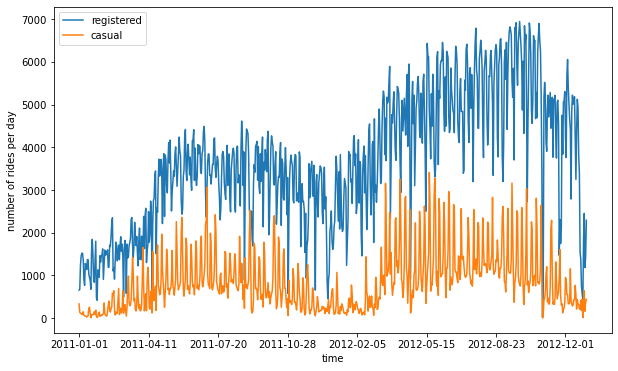

In [7]:
# plot evolution of rides over time
plot_data=bikesharing[['dteday','registered','casual']]
ax=plot_data.groupby('dteday').sum().plot(figsize=(10,6))
ax.set_xlabel("time")
ax.set_ylabel("number of rides per day")
plt.savefig('figs/rides_daily.png', format='png')

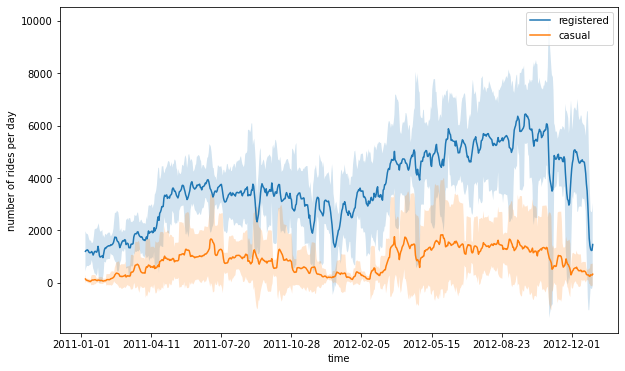

In [8]:
plot_data = bikesharing[['registered', 'casual', 'dteday']]
plot_data = plot_data.groupby('dteday').sum()
window = 7
rolling_means = plot_data.rolling(window).mean()
rolling_deviations = plot_data.rolling(window).std()
"""
Create a plot of the series, where we first plot the series of rolling means, then we color the zone between the series of rolling means +- 2 rolling standard deviations
"""
ax = rolling_means.plot(figsize=(10,6))
ax.fill_between(rolling_means.index, rolling_means['registered'] + 2*rolling_deviations['registered']
, rolling_means['registered'] - 2*rolling_deviations['registered'], alpha = 0.2)

ax.fill_between(rolling_means.index, rolling_means['casual'] + 2*rolling_deviations['casual']
, rolling_means['casual'] - 2*rolling_deviations['casual'], alpha = 0.2)

ax.set_xlabel("time");

ax.set_ylabel("number of rides per day");

plt.savefig('figs/rides_aggregated.png', format='png')

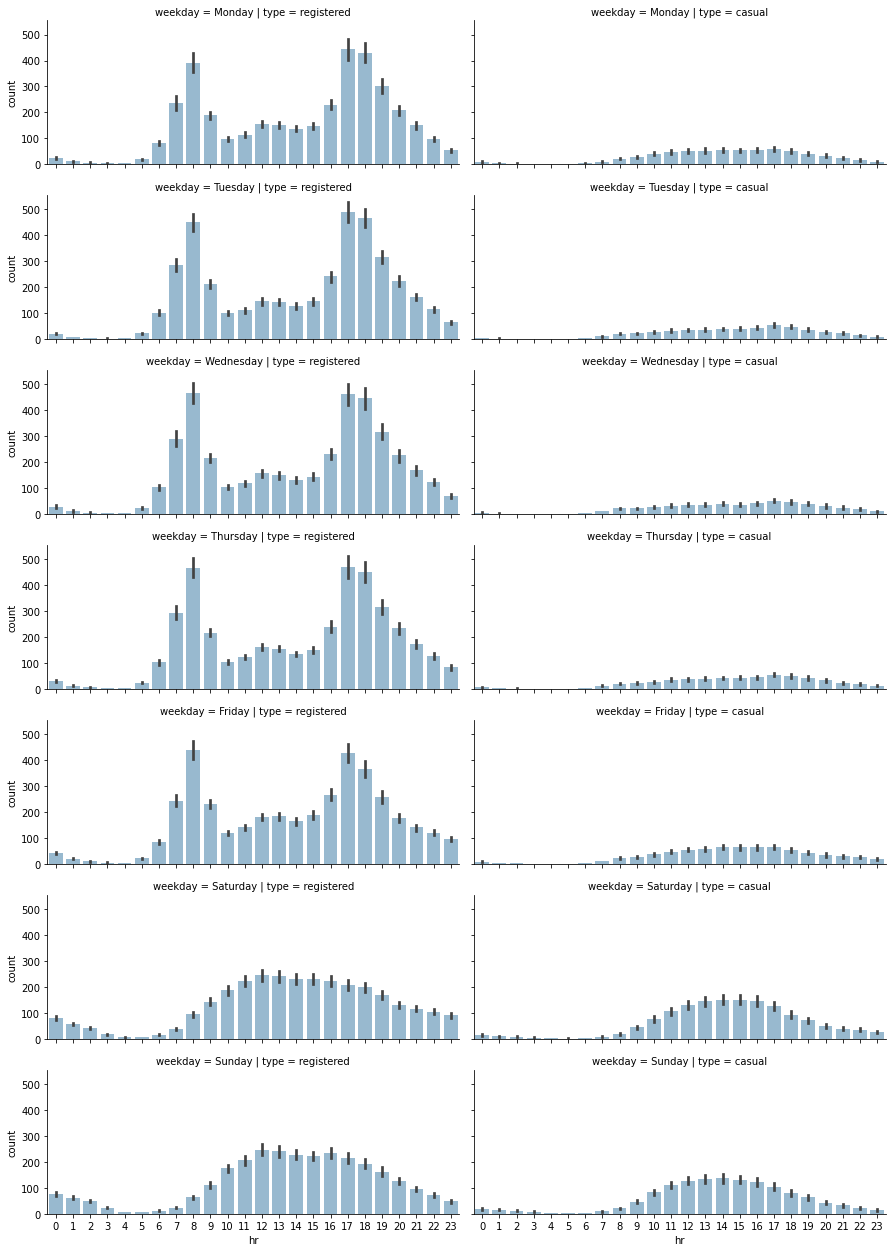

In [13]:
# distribution of bike rides during a day and then during days of a week
plot_data=bikesharing[['hr','weekday','registered','casual']]
plot_data=plot_data.melt(id_vars=['hr','weekday'],var_name='type',value_name='count')
# define FacetGrid
grid = sns.FacetGrid(plot_data, row='weekday',col='type', height=2.5, aspect=2.5,row_order=['Monday', 'Tuesday', 'Wednesday', 'Thursday',                    'Friday', 'Saturday', 'Sunday'])
# populate the FacetGrid with the specific plots
grid.map(sns.barplot, 'hr', 'count', alpha=0.5)
grid.savefig('figs/weekday_hour_distributions.png', format='png')